# Load libraries

In [3]:
import numpy as np
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# a.	Compare the SVM classification performance before and after PCA transformation

In [10]:
# Load dataset
load_data = "seeds_dataset.csv"
names = ['area A', 'perimeter P', 'C', 'length', 'width','asymmetry','groove','class']
df = read_csv(load_data, names=names)

In [11]:
df

,area A,perimeter P,C,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


# a.	Compare the SVM classification performance before PCA

In [14]:
import pandas as pd 
import numpy as np 
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import train_test_split 
load_data = "seeds_dataset.csv"
names = ['area A', 'perimeter P', 'C', 'length', 'width','asymmetry','groove','class']
df = read_csv(load_data, names=names)
array = df.values
X = array[:,0:7]
Y = array[:,7] 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1) 
models = [] 
models.append(('SVM', SVC(gamma='auto'))) 
results = [] 
names = [] 
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 0.893015 (0.068514)


# Feature Extraction with PCA

In [13]:
# Feature Extraction with PCA
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
load_data = "seeds_dataset.csv"
names = ['area A', 'perimeter P', 'C', 'length', 'width','asymmetry','groove','class']
df = read_csv(load_data, names=names)
array = df.values
X = array[:,0:7]
Y = array[:,7]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)

Explained Variance:[0.8293852  0.16363245 0.00565791]
[[ 0.8842285   0.39540542  0.00431132  0.12854448  0.11105914 -0.12761562
   0.1289665 ]
 [ 0.10080577  0.05648963 -0.00289474  0.03062173  0.00237229  0.98941048
   0.08223339]
 [ 0.26453354 -0.28251995  0.05903584 -0.40014946  0.31923869  0.06429754
  -0.76193973]]


# explained_variance_ratio 

In [15]:
# summarize components
print("Explained Variance:%s" % fit.explained_variance_ratio_)

Explained Variance:[0.8293852  0.16363245 0.00565791]


# PCA_Components 

In [16]:
print(fit.components_)

[[ 0.8842285   0.39540542  0.00431132  0.12854448  0.11105914 -0.12761562
   0.1289665 ]
 [ 0.10080577  0.05648963 -0.00289474  0.03062173  0.00237229  0.98941048
   0.08223339]
 [ 0.26453354 -0.28251995  0.05903584 -0.40014946  0.31923869  0.06429754
  -0.76193973]]


# Print the PCA Transform 

In [19]:
from sklearn.preprocessing import StandardScaler
features = ['area A', 'perimeter P', 'C', 'length', 'width','asymmetry','groove']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['class']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [20]:
principalDf

,principal component 1,principal component 2
0,0.317047,0.783669
1,-0.003386,1.913214
2,-0.459443,1.907225
3,-0.591936,1.931069
4,1.102910,2.068090
...,...,...
205,-1.991107,0.865956
206,-2.726865,-0.208190
207,-1.403633,-1.298593
208,-2.339328,0.099699


# b.	Compare the SVM classification performance after PCA transformation. 

In [28]:
import pandas as pd 
import numpy as np 
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import train_test_split 
from numpy import set_printoptions 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
load_data = "seeds_dataset.csv"
names = ['area A', 'perimeter P', 'C', 'length', 'width','asymmetry','groove','class']
daf = read_csv(load_data, names=names)
#remove least significant values
daf.drop(['C','asymmetry','groove'],axis=1,inplace=True)
array = daf.values
X = array[:,0:4] 
Y = array[:,4] 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1) 
models = [] 
models.append(('SVM', SVC(gamma='auto'))) 
results = [] 
names = [] 
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) 

SVM: 0.851103 (0.062028)


# c.	How did PCA help in this study case ?

# Explain your opinion 
# Ans. due to remove others three column which affect the total accuracy, that's why fall the accuracy of the model.

# 2)	For given Simple Regression Problem, the x-axis represents age of a CAr, and the y-axis represents speed of that Car:

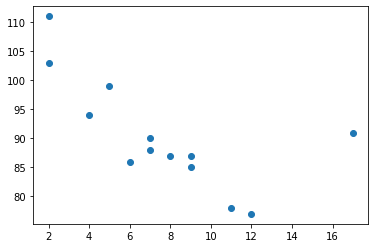

In [29]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,90,87,88,111,91,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

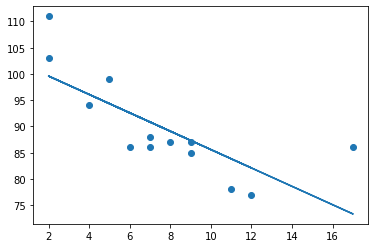

In [30]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

# POly

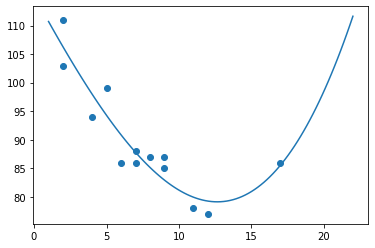

In [32]:
import numpy
import matplotlib.pyplot as plt


mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

# Find the r2-coefficient 

In [39]:
import numpy
from sklearn.metrics import r2_score


mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.8816766587791962


# Solve and Print the Pearson Correlation Coefficient (r)

In [34]:
r = np.corrcoef(x, y)
print(r)

[[ 1.    -0.759]
 [-0.759  1.   ]]


# Solve and Print the RMSE or std_error ?

In [36]:
import math
MSE = np.square(np.subtract(x,y)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

83.1106769036603


In [ ]:
# 

In [37]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

-0.758591524376155


# Predict the speed of a 10 years old car:

In [38]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

speed = myfunc(10)

print(speed)

85.59308314937454


# 4)	Find the 10-fold Cross Validation Regression Performance of the above regression model ?

In [ ]:
# compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Load dataset
#url ='qsar_fish_toxicity.csv'
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv"
names = ['a', 'b', 'c', 'd', 'e','f','g']
dataset = read_csv(url, names=names)
# Split-out validation dataset
array = dataset.values
X = array[:,0:6]
y = array[:,6]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()